## Bike Sharing Assignment

- By Mayank Singh Soni

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
dataset = pd.read_csv('day.csv')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of the dataset
dataset.shape

(730, 16)

In [5]:
# Checking info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Converting date field to datatime Dtype from object Dtype
dataset.dteday = dataset.dteday.astype("datetime64")

In [7]:
# Checking info again
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Describe function
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# Dropping casual & registered columns as the information is already convey in cnt variable
dataset.drop(["casual", "registered"], axis=1, inplace=True)

In [11]:
# Season field
dataset.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
dataset.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
dataset[['season']] = dataset[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
dataset.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
# Month field
def convert_month(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

dataset[['mnth']] = dataset[['mnth']].apply(convert_month)
dataset.mnth.value_counts()

Jan    62
Dec    62
Mar    62
Oct    62
Jul    62
Aug    62
May    62
Nov    60
Apr    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [15]:
# Weekday field
dataset[['weekday']] = dataset[['weekday']].apply(lambda x: x.map({0:'sunday',
                                                                    1:'monday',
                                                                    2:'tuesday',
                                                                    3:'wednesday',
                                                                    4:'thursday',
                                                                    5:'friday',
                                                                    6:'saturday'}))
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,0,Jan,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,0,Jan,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,Jan,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,Jan,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Weathersit field
dataset[['weathersit']] = dataset[['weathersit']].apply(lambda x: x.map({1: 'clear',
                                                                         2: 'mist & cloudy',
                                                                         3: 'light snow rain',
                                                                         4: 'heavy snow rain'}))
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,monday,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,0,Jan,0,tuesday,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Dropping instant field as it is of no use in modelling
dataset.drop(['instant'], axis=1, inplace=True)
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,monday,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,0,Jan,0,tuesday,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Dropping dteday field as it is of no use in modelling
dataset.drop(['dteday'], axis=1, inplace=True)
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


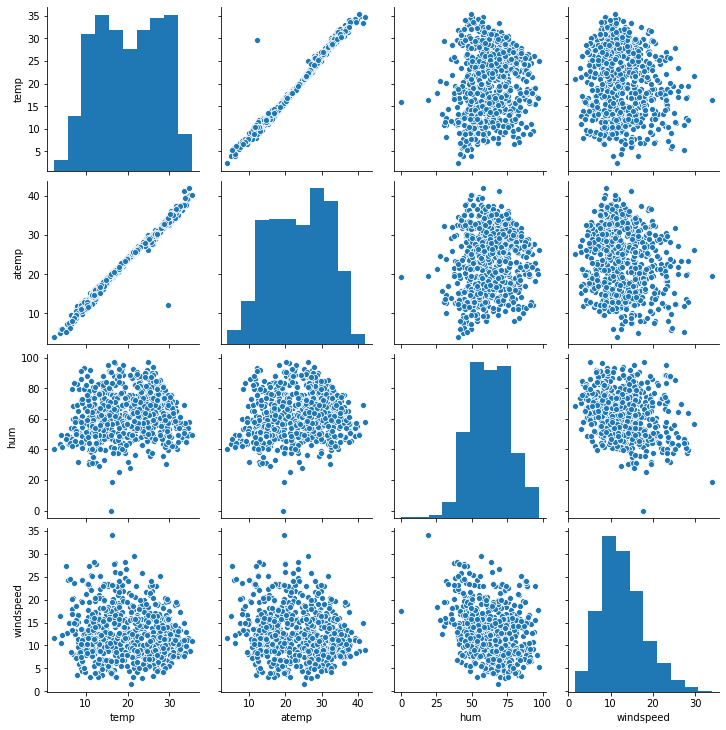

In [20]:
# Data visualization of numerical columns
sns.pairplot(dataset[['temp','atemp','hum','windspeed']])
plt.show()

 - No specific pattern observed
 - except in temp and atemp, there is a linear relationship observed between them

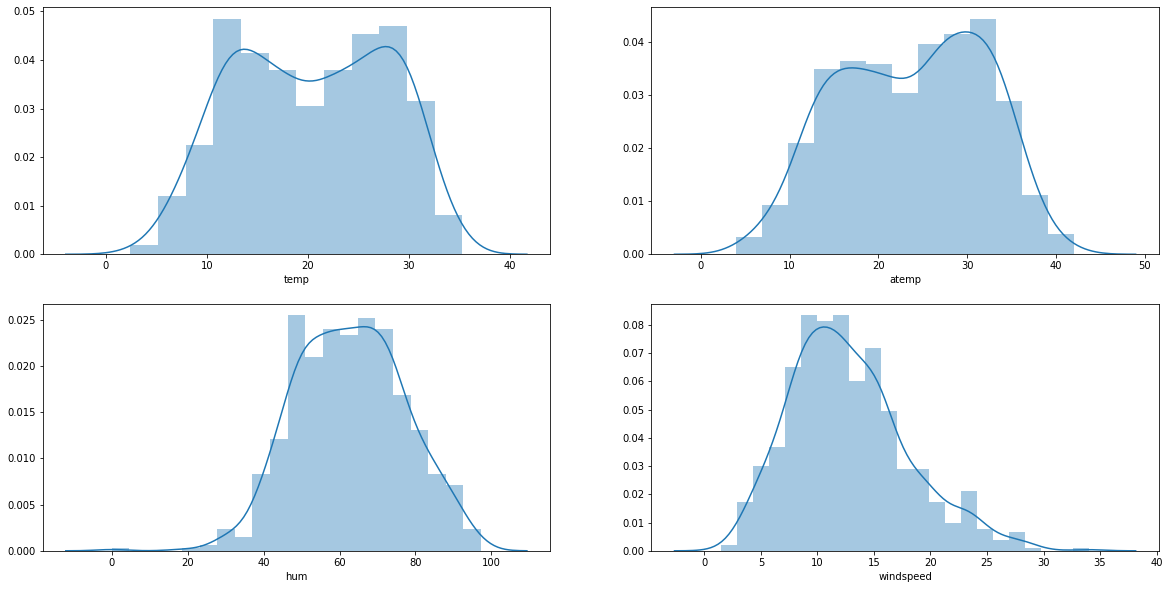

In [21]:
plt.figure(figsize=[20, 10])
plt.subplot(2, 2, 1)
sns.distplot(dataset.temp)
plt.subplot(2, 2, 2)
sns.distplot(dataset.atemp)
plt.subplot(2, 2, 3)
sns.distplot(dataset.hum)
plt.subplot(2, 2, 4)
sns.distplot(dataset.windspeed)
plt.show()

 - All fields are normaly distributed

In [22]:
# Categorical variables
dataset.select_dtypes(exclude=['float64','int64','datetime64'])

,season,mnth,weekday,weathersit
0,spring,Jan,monday,mist & cloudy
1,spring,Jan,tuesday,mist & cloudy
2,spring,Jan,wednesday,clear
3,spring,Jan,thursday,clear
4,spring,Jan,friday,clear
...,...,...,...,...
725,spring,Dec,friday,mist & cloudy
726,spring,Dec,saturday,mist & cloudy
727,spring,Dec,sunday,mist & cloudy
728,spring,Dec,monday,clear


#### Univariate analysis on categorical variables

In [23]:
def bivariate_analysis(data, x_col, y_col, title):
    plt.figure(figsize=(10, 5))
    plot = sns.boxplot(data=data, x=x_col, y=y_col)
    plot.set_yticklabels(plot.get_yticks(), size = 11)
    plt.figtext(.5,.9, title, fontsize=15, ha='center')
    plt.show()

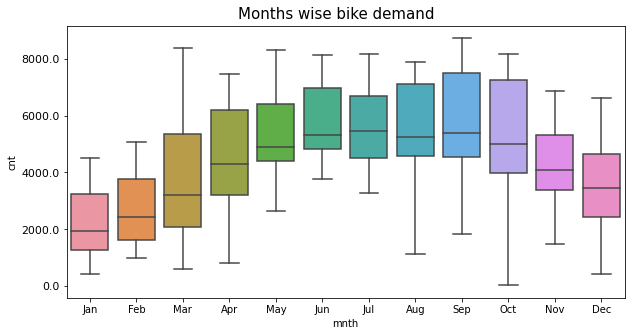

In [24]:
bivariate_analysis(data=dataset, x_col='mnth', y_col='cnt', title='Months wise bike demand')

 - It is observed that there is rise in demand of bike from March month to Jun month
 - Then a small drop then, again rise till September month

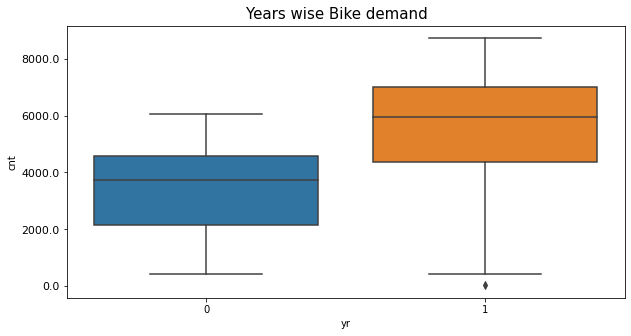

In [25]:
bivariate_analysis(data=dataset, x_col='yr', y_col='cnt', title='Years wise Bike demand')

 - Clearly visible that there is a rise in demand in 2019

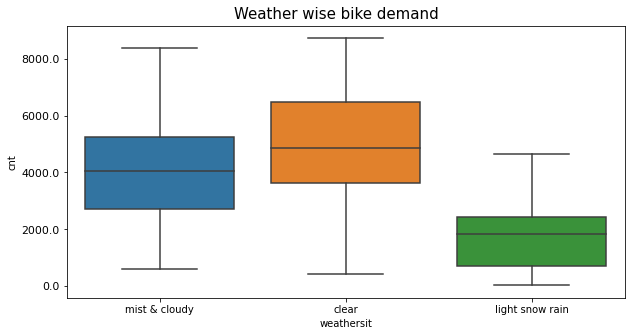

In [26]:
bivariate_analysis(data=dataset, x_col='weathersit', y_col='cnt', title='Weather wise bike demand')

 - There is very less demand when the weather is light snow rain
 - There is very high demand when the weather is clear
 - There is a moderate demand when the weather is mist & cloudy

#### Correlation

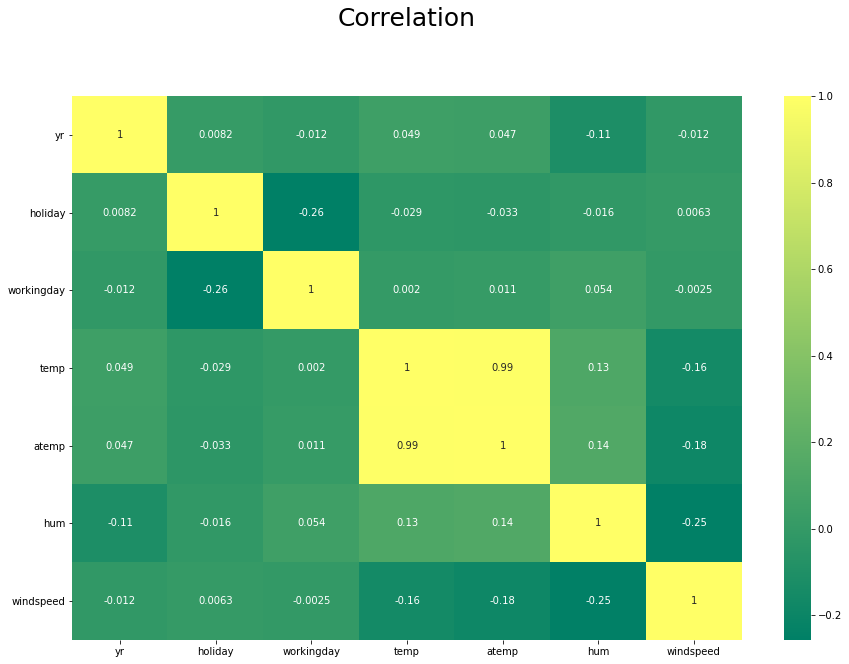

In [27]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(dataset.drop(columns='cnt').corr(), cmap="summer",annot=True)
plt.title('Correlation')
plt.yticks(rotation=0)
plt.show()

 - There is very string correlation between temp and atemp field with coefficient of 0.99. Thus, it falls under multi-collinearity
 - Thus, dropping atemp is required

In [28]:
# Dropping atemp column
dataset.drop(["atemp"], axis=1, inplace=True)

### Creating Dummy Variable

In [29]:
# Season column
dummies_season = pd.get_dummies(dataset.season, drop_first=True)
dummies_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
# Month column
dummies_mnth = pd.get_dummies(dataset.mnth, drop_first=True)
dummies_mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Weekday column
dummies_weekday = pd.get_dummies(dataset.weekday, drop_first=True)
dummies_weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [32]:
# Weather sit column
dummies_weathersit = pd.get_dummies(dataset.weathersit, drop_first=True)
dummies_weathersit.head()

,light snow rain,mist & cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### concatenate all dummies dataframes

In [33]:
dataset = pd.concat([dataset, dummies_season, dummies_mnth, dummies_weathersit, dummies_weekday], axis=1)

# Dropping columns
dataset.drop(columns=['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,light snow rain,mist & cloudy,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting dataset into train and test dataset

In [34]:
df_train, df_test = train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=0)
print("Shape of df_train: ", df_train.shape, ", Shape of df_test: ", df_test.shape)

Shape of df_train:  (510, 29) , Shape of df_test:  (219, 29)


In [35]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,light snow rain,mist & cloudy,monday,saturday,sunday,thursday,tuesday,wednesday
235,0,0,1,27.606653,60.5000,16.958236,5130,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,1,0,0,29.144153,43.7083,9.667229,7498,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12,0,0,0,6.765000,47.0417,20.167000,1406,1,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,1,29.725000,65.4583,10.374950,4966,0,1,0,...,0,0,0,0,1,0,0,0,0,0
556,1,0,1,29.383347,63.3333,10.166111,7264,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'light snow rain', 'mist & cloudy',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [37]:
# Scaling fields
scalar = MinMaxScaler()

numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']
df_train[numerical_cols] = scalar.fit_transform(df_train[numerical_cols])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,light snow rain,mist & cloudy,monday,saturday,sunday,thursday,tuesday,wednesday
235,0,0,1,0.753859,0.488399,0.527988,0.587667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,1,0,0,0.802869,0.254640,0.255430,0.860101,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12,0,0,0,0.089497,0.301044,0.647940,0.159227,1,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,1,0.821384,0.557424,0.281887,0.568799,0,1,0,...,0,0,0,0,1,0,0,0,0,0
556,1,0,1,0.810494,0.527842,0.274080,0.833180,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Divide data into X and y after scaling
X_train = df_train.drop(columns=['cnt'], axis=1)
y_train = df_train['cnt']

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,light snow rain,mist & cloudy,monday,saturday,sunday,thursday,tuesday,wednesday
235,0,0,1,0.753859,0.488399,0.527988,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
524,1,0,0,0.802869,0.254640,0.255430,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0,0,0,0.089497,0.301044,0.647940,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,1,0.821384,0.557424,0.281887,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
556,1,0,1,0.810494,0.527842,0.274080,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

In [40]:
lm = LinearRegression()

# fitting the model
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
# Applying RFE with 10 features
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

In [43]:
rfe.ranking_

array([ 1,  1,  8,  1,  1,  1,  1, 18,  2,  1,  6,  4,  5,  1,  1, 19, 12,
        3, 16, 11,  1,  7, 13,  9, 10, 17, 14, 15])

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 18),
 ('winter', False, 2),
 ('Aug', True, 1),
 ('Dec', False, 6),
 ('Feb', False, 4),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 19),
 ('May', False, 12),
 ('Nov', False, 3),
 ('Oct', False, 16),
 ('Sep', False, 11),
 ('light snow rain', True, 1),
 ('mist & cloudy', False, 7),
 ('monday', False, 13),
 ('saturday', False, 9),
 ('sunday', False, 10),
 ('thursday', False, 17),
 ('tuesday', False, 14),
 ('wednesday', False, 15)]

In [45]:
# 15 feature/columns choosen by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'Aug', 'Jul',
       'Jun', 'light snow rain'],
      dtype='object')

#### Further reducing feature with manual inspection

In [46]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,Aug,Jul,Jun,light snow rain
235,0,0,0.753859,0.488399,0.527988,0,1,0,0,0
524,1,0,0.802869,0.254640,0.255430,0,0,0,1,0
12,0,0,0.089497,0.301044,0.647940,1,0,0,0,0
161,0,0,0.821384,0.557424,0.281887,0,0,0,1,0
556,1,0,0.810494,0.527842,0.274080,0,0,1,0,0


In [47]:
# Use statsmodel to inspect the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,Aug,Jul,Jun,light snow rain
235,1.0,0,0,0.753859,0.488399,0.527988,0,1,0,0,0
524,1.0,1,0,0.802869,0.254640,0.255430,0,0,0,1,0
12,1.0,0,0,0.089497,0.301044,0.647940,1,0,0,0,0
161,1.0,0,0,0.821384,0.557424,0.281887,0,0,0,1,0
556,1.0,1,0,0.810494,0.527842,0.274080,0,0,1,0,0


In [48]:
# Function to show VIF
def show_VIF(df):
    df = df.drop(columns='const', axis=1)
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [49]:
# Function to train model and show model summary
def model_build(X_train_rfe):
    # Running the linear model
    lm = sm.OLS(y_train, X_train_rfe).fit()
    # show summary of the model
    return lm, lm.summary()

### Model 1
 - With all columns RFE Columns

In [50]:
lm, lm_summary = model_build(X_train_rfe)
lm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.50e-176
Time:                        14:08:41   Log-Likelihood:                 487.70
No. Observations:                 510   AIC:                            -953.4
Df Residuals:                     499   BIC:                            -906.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3635      0.023     16.059      0.000       0.319       0.408
yr                  0.2175      0.008     25.698      0.000       0.201       0.234
holiday            -0.0666      0.025     -2.685      0.007      -0.115      -0.018
temp                0.5403      0.031     17.441      0.000       0.479       0.601
hum                -0.2161      0.025     -8.588      0.000      -0.266      -0.167
windspeed          -0.1605      0.023     -6.967      0.000      -0.206      -0.115
spring             -0.1381      0.013    -10.898      0.000      -0.163      -0.113
Aug                -0.0816      0.018     -4.466      0.000      -0.118      -0.046
Jul                -0.1479      0.020     -7.304      0.000      -0.188      -0.108
Jun                -0.0929      0.018     -5.044      0.000      -0.129      -0.057
light snow rain    -0.1430      0.030     -4.810      0.000      -0.201      -0.085
==============================================================================
Omnibus:                       45.629   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.746
Skew:                          -0.564   Prob(JB):                     1.08e-18
Kurtosis:                       4.620   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
show_VIF(X_train_rfe)

,Features,VIF
2,temp,13.40
3,hum,7.37
4,windspeed,3.91
0,yr,1.98
7,Jul,1.78
5,spring,1.71
8,Jun,1.68
6,Aug,1.59
9,light snow rain,1.16
1,holiday,1.04


 - Although R-squared and Adj. R-Sqaured are found 0.816 and 0.812 respectively.
 - Let's drop temp column as it has high VIF and then check the model summary

### Model 2
 - With dropping 'temp' column

In [52]:
lm, lm_summary = model_build(X_train_rfe.drop(["temp"], axis=1))
lm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.39e-126
Time:                        14:08:41   Log-Likelihood:                 366.33
No. Observations:                 510   AIC:                            -712.7
Df Residuals:                     500   BIC:                            -670.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5622      0.025     22.681      0.000       0.513       0.611
yr                  0.2350      0.011     22.054      0.000       0.214       0.256
holiday            -0.0519      0.031     -1.652      0.099      -0.114       0.010
hum                -0.1138      0.031     -3.669      0.000      -0.175      -0.053
windspeed          -0.1510      0.029     -5.175      0.000      -0.208      -0.094
spring             -0.2575      0.014    -19.055      0.000      -0.284      -0.231
Aug                 0.0853      0.020      4.323      0.000       0.047       0.124
Jul                 0.0600      0.021      2.892      0.004       0.019       0.101
Jun                 0.0768      0.020      3.878      0.000       0.038       0.116
light snow rain    -0.1888      0.038     -5.029      0.000      -0.263      -0.115
==============================================================================
Omnibus:                       35.598   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.493
Skew:                          -0.403   Prob(JB):                     6.67e-17
Kurtosis:                       4.690   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
show_VIF(X_train_rfe.drop(["temp"], axis=1))

,Features,VIF
2,hum,3.31
3,windspeed,3.30
0,yr,1.84
4,spring,1.46
5,Aug,1.15
7,Jun,1.14
6,Jul,1.11
8,light snow rain,1.11
1,holiday,1.03


 - R-squared and Adj. R-Squared values are dropped to 0.704 and 0.699 respectively
 - Now, dropping holiday column as it has highest p-value which is greater than 0.05

### Model 3
 - After dropping holiday column

In [54]:
lm, lm_summary = model_build(X_train_rfe.drop(["temp", "holiday"], axis=1))
lm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.35e-126
Time:                        14:08:41   Log-Likelihood:                 364.94
No. Observations:                 510   AIC:                            -711.9
Df Residuals:                     501   BIC:                            -673.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5587      0.025     22.584      0.000       0.510       0.607
yr                  0.2357      0.011     22.101      0.000       0.215       0.257
hum                -0.1127      0.031     -3.629      0.000      -0.174      -0.052
windspeed          -0.1493      0.029     -5.109      0.000      -0.207      -0.092
spring             -0.2573      0.014    -19.009      0.000      -0.284      -0.231
Aug                 0.0872      0.020      4.422      0.000       0.048       0.126
Jul                 0.0594      0.021      2.859      0.004       0.019       0.100
Jun                 0.0788      0.020      3.978      0.000       0.040       0.118
light snow rain    -0.1875      0.038     -4.986      0.000      -0.261      -0.114
==============================================================================
Omnibus:                       39.352   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.560
Skew:                          -0.430   Prob(JB):                     1.60e-19
Kurtosis:                       4.826   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
show_VIF(X_train_rfe.drop(["temp", "holiday"], axis=1))

,Features,VIF
2,windspeed,3.30
1,hum,3.29
0,yr,1.84
3,spring,1.46
4,Aug,1.14
6,Jun,1.14
5,Jul,1.11
7,light snow rain,1.11


- In the final model, we have  
    - `Adjusted R-square` has a values of ~0.702
    - `R-square` has a values of ~0.698
    
    Both values are close and in range `>0.80`, which looks good.
    
    - Total number of variables/features ~ 8

In [56]:
X_train_rfe.drop(["temp", "holiday"], axis=1, inplace=True)

#### Residual Analysis

In [57]:
X_train_res = sm.add_constant(X_train_rfe)
y_train_pred = lm.predict(X_train_res)

res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

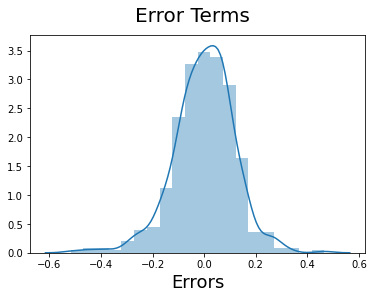

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

 - There is a normal distribution observed in error terms

In [59]:
# Apply transform on test dataset
df_test[numerical_cols] = scalar.transform(df_test[numerical_cols])

In [60]:
# Splitting Test dataset into X and Y
X_test = df_test.drop(columns='cnt', axis=1)
y_test = df_test.cnt

In [61]:
# Creating dataframe for test dataset with selected columns
X_test_rfe = X_test[X_train_rfe.columns.drop(["const"])]

In [62]:
# Adding constant variable
X_test_rfe = sm.add_constant(X_test_rfe)

In [63]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

#### Model Evaluation

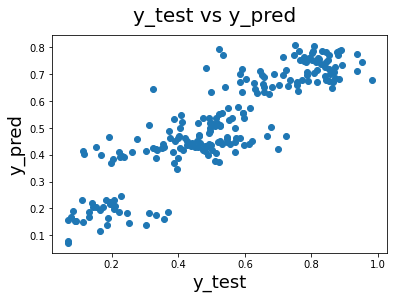

In [64]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

The above graph shows the y_pred values are pretty much close to the y_test values. Only few points are scatter bit.

In [65]:
# Top Predictor Model
lm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.35e-126
Time:                        14:08:41   Log-Likelihood:                 364.94
No. Observations:                 510   AIC:                            -711.9
Df Residuals:                     501   BIC:                            -673.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5587      0.025     22.584      0.000       0.510       0.607
yr                  0.2357      0.011     22.101      0.000       0.215       0.257
hum                -0.1127      0.031     -3.629      0.000      -0.174      -0.052
windspeed          -0.1493      0.029     -5.109      0.000      -0.207      -0.092
spring             -0.2573      0.014    -19.009      0.000      -0.284      -0.231
Aug                 0.0872      0.020      4.422      0.000       0.048       0.126
Jul                 0.0594      0.021      2.859      0.004       0.019       0.100
Jun                 0.0788      0.020      3.978      0.000       0.040       0.118
light snow rain    -0.1875      0.038     -4.986      0.000      -0.261      -0.114
==============================================================================
Omnibus:                       39.352   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.560
Skew:                          -0.430   Prob(JB):                     1.60e-19
Kurtosis:                       4.826   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Top 3 features
- const `(coeff ~ 0.5587)`
- yr `(coeff ~ 0.2357)`
- spring `(coeff ~ -0.2573)`